# Module

In [6]:
import pandas as pd
import numpy as np

from sklearn.decomposition import PCA

from sklearn.pipeline import Pipeline

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler, Binarizer

from sklearn.feature_selection import SelectFromModel

from sklearn.linear_model import LogisticRegression, Ridge

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, cross_val_score

from sklearn.metrics import make_scorer, confusion_matrix, roc_curve, auc, f1_score, accuracy_score, precision_score, recall_score, log_loss

import matplotlib.pyplot as plt

import seaborn as sns

# from PIL import Image -> df를 png로 저장하고 싶을 때 사용

# Rectified Dataset split

In [ ]:
train = pd.read_csv('../dataset_processed/train_538132.csv')
val = pd.read_csv('../dataset_processed/validation_179377.csv')
test = pd.read_csv('../dataset_processed/test_179378.csv')

In [9]:
print(X_train.shape)
print(y_train.shape)
print(X_val.shape)
print(y_val.shape)
print(X_test.shape)
print(y_test.shape)

(538132, 86)
(538132,)
(179377, 86)
(179377,)
(179378, 86)
(179378,)


In [10]:
X_columns = ['home_ownership1', 'home_ownership2', 'home_ownership3',
       'home_ownership4', 'home_ownership5', 'verification_status1',
       'verification_status2', 'addr_state1', 'addr_state2', 'addr_state3',
       'addr_state4', 'addr_state5', 'addr_state6', 'addr_state7',
       'addr_state8', 'addr_state9', 'addr_state10', 'addr_state11',
       'addr_state12', 'addr_state13', 'addr_state14', 'addr_state15',
       'addr_state16', 'addr_state17', 'addr_state18', 'addr_state19',
       'addr_state20', 'addr_state21', 'addr_state22', 'addr_state23',
       'addr_state24', 'addr_state25', 'addr_state26', 'addr_state27',
       'addr_state28', 'addr_state29', 'addr_state30', 'addr_state31',
       'addr_state32', 'addr_state33', 'addr_state34', 'addr_state35',
       'addr_state36', 'addr_state37', 'addr_state38', 'addr_state39',
       'addr_state40', 'addr_state41', 'addr_state42', 'addr_state43',
       'addr_state44', 'addr_state45', 'addr_state46', 'addr_state47',
       'addr_state48', 'addr_state49', 'addr_state50', 'emp_length1',
       'emp_length2', 'emp_length3', 'emp_length4', 'emp_length5',
       'emp_length6', 'emp_length7', 'emp_length8', 'emp_length9',
       'emp_length10', 'emp_length11', 'inq_last_6mths', 'open_acc', 'pub_rec',
       'pub_rec_bankruptcies', 'tax_liens', 'loan_amnt_log', 'annual_inc_log',
       'dti_log', 'delinq_2yrs_log', 'fico_average_log', 'revol_bal_log',
       'revol_util_log', 'total_acc_log', 'collections_12_mths_ex_med_log',
       'tot_coll_amt_log', 'purpose_group1', 'purpose_group2',
       'purpose_group4']

### ----------> 바로 Training 단계로 넘어가면 됨

# DataFrame -> (사용 x)

In [ ]:
# 사용할 dataframe 불러오기 # df로 변수명 써야함! (아래에서 바꿔주지 않으려면)
df = pd.read_csv("lendingclub_ver3.csv")
# df = pd.read_csv("preprocessed_lendingclub_ver2.csv")
# df = pd.read_stata("lendingclub.dta")

# 임시로 전처리한 dataframe 생성
# df = df.drop(['Unnamed: 0.1','Unnamed: 0'], axis=1)
df = df.drop(['Unnamed: 0'], axis=1)

FileNotFoundError: [Errno 2] No such file or directory: 'lendingclub_ver3.csv'

### df 시각화

In [11]:
# dataframe에서 행과 열이 전부 다 보이게 설정
pd.set_option('display.max_colwidth', 1000, 'display.max_rows', None, 'display.max_columns', None)

print(df.shape)

df.head()

NameError: name 'df' is not defined

In [ ]:
df['term1'].value_counts()

1    953392
0    139527
Name: term1, dtype: int64

# X, y split -> (사용 x)

In [ ]:
# X, y split
X = df.drop('depvar',axis=1)
y = df['depvar']
# X.shape

# train-val-test split -> (사용 x)

train set (60%) -> GridSearchCV(for hyperparameter selection) | training

validation set (20%) -> for optimal threshold selection

test set (20%) -> for model perfomance comparison

random state = 77

6:4 -> 5:5

(538132, 86)(179377, 86)(179378, 86)

In [ ]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=77)

# Split the training set into training and validation sets
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=77)

# Standard Scale 적용
sc = StandardScaler()

X_train, X_val, X_test = sc.fit_transform(X_train), sc.fit_transform(X_val), sc.fit_transform(X_test)

In [ ]:
# dataset별 개수 확인
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

(538132, 86)
(179377, 86)
(179378, 86)


# option. PCA (사용 x)

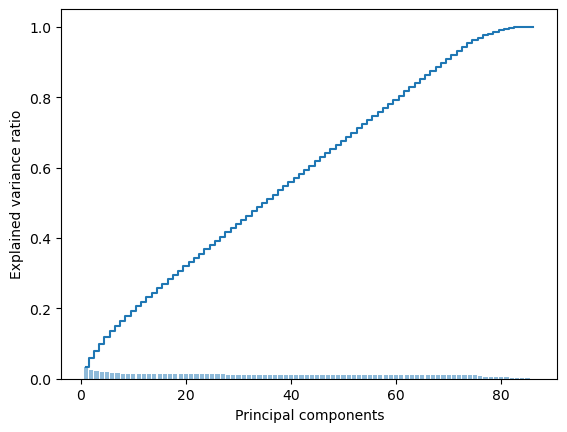

81
[[-0.67993595 -0.26700818  1.51972853 ...  0.20278236 -0.46794706
   0.63918452]
 [ 1.65417488 -1.44778249  1.2150025  ... -0.77156449 -0.24868834
  -0.2521504 ]
 [ 1.34765756 -0.01981189  0.42767758 ... -0.23488403 -0.2781112
  -1.00032731]
 ...
 [-0.05686894  0.50163651  0.15282073 ... -0.19526441 -0.4489866
  -0.72361082]
 [ 1.15966876  0.656796    1.44749243 ... -0.01937099  0.84445435
   0.15140064]
 [-0.11875446  0.77462074  2.06104111 ... -0.54691383  0.91539516
  -0.62801902]]


In [ ]:
# pca = PCA(n_components=n)
pca = PCA()
X_pca = pca.fit_transform(X_std)

cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.99) + 1 # 설명력 0.99 이상

plt.bar(range(1, X_std.shape[1]+1), pca.explained_variance_ratio_, alpha=0.5, align='center')
plt.step(range(1, X_std.shape[1]+1), np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.show()

print(d)

pca = PCA(n_components=d)
X_pca_d = pca.fit_transform(X_std)

In [ ]:
# pca 변수에 대한 기존 설명변수의 기여도 확인
column_names = list(X.columns)

pca_list = pca.components_[:d].tolist()

pca_df = pd.DataFrame(index=list(X.columns))

for i in range(len(pca_list)):
    pca_df[i] = pca_list[i]
    
pca_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80
home_ownership1,0.003081,-0.000814,-0.006438,-0.000807,0.001673,0.018521,0.015799,-0.012714,0.016945,0.004414,0.002282,0.007129,0.010583,0.002961,0.014789,-0.024460,-0.038804,0.018198,-0.054932,0.037540,-0.017672,-0.007762,-0.022855,0.023289,-0.014596,-0.021295,0.034734,-0.050291,0.089149,-0.098780,-0.049692,0.083436,0.046424,0.054706,0.010028,0.010718,0.114318,0.063884,-0.095096,0.096363,0.001443,-0.109650,0.007704,-0.044117,0.130485,0.100512,-0.022862,-0.140350,-0.088201,-0.139720,-0.257950,0.036079,0.019166,-0.053638,0.083108,-0.148426,0.069945,-0.077129,-0.028032,0.105834,0.074823,0.116598,0.061320,-0.028401,0.077269,-0.029811,0.163915,0.785019,0.039414,-0.047105,0.135278,0.076937,-0.053670,-0.021849,0.007066,-0.000375,0.026715,-0.018887,0.001483,-0.007553,0.000667
home_ownership2,-0.240904,0.183123,-0.132571,-0.075319,0.153464,-0.208917,-0.275083,0.283346,-0.302131,0.053335,-0.030455,0.029721,0.029742,0.032399,0.045686,0.004896,-0.043062,-0.013606,-0.005034,0.026243,-0.012768,-0.012806,-0.019950,-0.009132,0.027560,-0.034251,-0.017294,0.013304,0.021566,0.002676,0.013190,-0.010109,0.004239,-0.037975,-0.037131,0.028434,-0.011987,0.001718,-0.011827,-0.016686,-0.015824,-0.006281,0.009222,-0.001089,-0.007237,-0.003903,-0.014139,-0.002724,0.011814,-0.009585,0.011210,-0.003007,-0.017909,0.011390,-0.004083,0.005931,0.018789,0.025507,-0.012436,0.018038,-0.002925,-0.024556,-0.013350,0.027987,0.007689,-0.007560,-0.009109,0.000562,0.039950,-0.061309,-0.011711,-0.040717,-0.003055,-0.018462,0.035032,0.006429,0.630959,-0.304546,-0.009787,-0.188382,-0.099076
home_ownership3,-0.000960,-0.004805,0.002005,0.002886,0.002454,-0.003587,0.006124,-0.002282,0.012895,-0.000740,-0.015453,0.013533,0.003363,-0.007622,-0.011797,0.014412,0.014229,0.003012,0.026419,-0.009682,0.031702,-0.008771,-0.042344,0.043864,-0.051446,-0.020071,0.030022,0.071349,0.018973,-0.048327,0.053180,-0.012188,-0.009983,-0.015974,-0.000813,0.060547,0.072629,-0.004921,0.112707,0.012175,-0.039729,-0.033749,-0.008505,0.061623,-0.032115,0.005771,0.121932,-0.058577,0.080462,0.156312,-0.067269,0.174786,0.029210,0.035304,-0.101820,0.053524,-0.019576,-0.069141,0.021069,-0.107716,0.031729,0.061004,0.049734,-0.184885,0.209662,-0.136565,0.792321,-0.192660,0.116374,-0.214696,-0.034643,0.039762,0.004897,-0.016178,0.002847,0.002782,0.010590,0.000277,0.000287,-0.003885,-0.001659
home_ownership4,-0.000576,-0.005001,0.000782,0.003202,0.002014,-0.009570,0.013425,0.001075,0.014046,-0.013681,0.004386,0.003013,0.002083,0.006660,0.005110,0.013939,-0.026880,0.007706,-0.002765,0.037447,0.036594,-0.013073,-0.019901,0.026005,-0.011402,0.024688,-0.011439,-0.022904,0.070880,0.052381,0.001480,-0.012505,0.017602,0.068347,0.161584,-0.008633,-0.067065,0.068828,0.036196,0.120495,0.046232,0.048782,0.129975,0.169507,0.304427,-0.037120,-0.072180,0.159721,0.053003,0.069345,0.162080,-0.081969,0.110571,0.024087,-0.054781,0.148606,-0.095322,-0.092519,-0.054402,0.096799,0.018278,0.048924,0.084953,-0.072465,-0.027312,0.052833,-0.008079,0.044958,0.736362,0.282262,-0.033262,-0.010002,0.025338,-0.023689,-0.003895,0.000935,0.011504,-0.000534,-0.000841,-0.002031,-0.002259
home_ownership5,0.073581,-0.041176,-0.016155,0.036839,-0.158322,0.087729,0.350120,-0.412680,0.169600,0.187280,0.089729,-0.123366,-0.137066,-0.074996,-0.145240,0.015055,0.002782,-0.017715,0.130979,-0.162392,0.048647,0.045756,0.055693,0.050889,0.060152,0.053417,-0.007118,0.004081,-0.070614,0.060001,0.004839,-0.001843,0.012701,-0.015779,0.016185,-0.036188,-0.019584,-0.070507,0.017898,-0.004651,-0.047511,0.014041,-0.045389,0.025726,0.000195,-0.009670,-0.015904,0.026614,-0.018657,0.003537,0.013148,-0.001380,-0.027999,0.005802,0.000225,-0.007899,-0.020919,-0.015191,0.020079,-0.019226,0.003904,0.016267,0.005577,-0.039927,-0.031662,0.

In [ ]:
# column 개수 비교
print(X_std.shape)
print(X_pca_d.shape)

NameError: name 'X_std' is not defined

# Training

## 1. Rogistic
## 2. Lasso
## 3. Ridge
## 4. Elastic Net
(K-fold cross validation -> K=cv)

### pipeline object

### solver

The LogisticRegression class in scikit-learn supports several different solvers for the L1-penalized logistic regression problem, which is also known as logistic Lasso. The specific solver used by LogisticRegression depends on the value of the solver parameter, which can be set to one of the following values:

'liblinear': This is the default solver for small datasets. It uses an iterative algorithm that works well when the number of samples is much larger than the number of features.

'saga': This solver is an improved version of the liblinear solver that supports both L1 and L2 penalties, and can handle both dense and sparse input matrices. It is well-suited for large-scale problems with many features.

'saga' with penalty='elasticnet': This is an extension of the saga solver that supports elastic-net regularization, which is a combination of L1 and L2 penalties.

'lbfgs': This solver is an optimization algorithm that works well when the number of features is much larger than the number of samples. It only supports L2 regularization, so it cannot be used for logistic Lasso.

In general, the choice of solver depends on the specific characteristics of your dataset, such as its size, sparsity, and number of features. The 'liblinear' and 'saga' solvers are good choices for most problems, while 'lbfgs' is more suitable for problems with many features. If you need to use elastic-net regularization, you should use the 'saga' solver with penalty='elasticnet'.

1. Rogistic

In [ ]:
# Define the pipeline
pipeline = Pipeline([
    ('penalty', LogisticRegression(penalty='none', solver='newton-cg')) # newton-cg > saga >>> liblinear(solve x)
])

2. Lasso

In [ ]:
# Define the pipeline
pipeline = Pipeline([
    ('penalty', SelectFromModel(LogisticRegression(penalty='l1', solver='liblinear'))),
    ('clf', LogisticRegression(solver='newton-cg'))
])

3. Ridge

In [ ]:
# Define the pipeline
pipeline = Pipeline([
    ('penalty', SelectFromModel(LogisticRegression(penalty='l2', solver='lbfgs'))), # lbfgs >> saga
    ('clf', LogisticRegression(solver='newton-cg'))
])

4. Elastic Net

In [ ]:
# Define the pipeline
pipeline = Pipeline([
    ('penalty', SelectFromModel(LogisticRegression(penalty='elasticnet', solver='saga'))),
    ('clf', LogisticRegression(solver='newton-cg'))
])

### param_grid (hyperparameter input)

In [ ]:
# pipeline object에 대해 지정해줄 수 있는 hyperparameter를 얻을 수 있음
pipeline.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'penalty', 'clf', 'penalty__estimator__C', 'penalty__estimator__class_weight', 'penalty__estimator__dual', 'penalty__estimator__fit_intercept', 'penalty__estimator__intercept_scaling', 'penalty__estimator__l1_ratio', 'penalty__estimator__max_iter', 'penalty__estimator__multi_class', 'penalty__estimator__n_jobs', 'penalty__estimator__penalty', 'penalty__estimator__random_state', 'penalty__estimator__solver', 'penalty__estimator__tol', 'penalty__estimator__verbose', 'penalty__estimator__warm_start', 'penalty__estimator', 'penalty__importance_getter', 'penalty__max_features', 'penalty__norm_order', 'penalty__prefit', 'penalty__threshold', 'clf__C', 'clf__class_weight', 'clf__dual', 'clf__fit_intercept', 'clf__intercept_scaling', 'clf__l1_ratio', 'clf__max_iter', 'clf__multi_class', 'clf__n_jobs', 'clf__penalty', 'clf__random_state', 'clf__solver', 'clf__tol', 'clf__verbose', 'clf__warm_start'])

1. Rogistic

In [ ]:
# define the hyperparameters you want to search over
param_grid = {
    'penalty__max_iter':[50], # newton-cg => 50
    'penalty__fit_intercept':[True]
}

2. Lasso

In [ ]:
# define the hyperparameters you want to search over
param_grid = {
#     'penalty__estimator__C':np.logspace(-4, 0, 10), # 규제 강도: 0.0001~1 사이의 10개 값
    'penalty__estimator__C': [0.1],
    'penalty__estimator__max_iter':[100],
    'penalty__estimator__fit_intercept':[True], # statsmodels와 달리 상수항 필요
    'clf__fit_intercept':[True]
}

3. Ridge

In [ ]:
# define the hyperparameters you want to search over
param_grid = {
    'penalty__estimator__C': [0.1, 1],
    'penalty__estimator__max_iter':[100], # lbfgs => 100
    'penalty__estimator__fit_intercept':[True],
    'clf__fit_intercept':[True]
}

4. Elastic Net

In [ ]:
# define the hyperparameters you want to search over
param_grid = {
    'penalty__estimator__C': [0.01, 0.1, 1.0, 10.0],
    'penalty__estimator__l1_ratio':[0.5],
    'penalty__estimator__max_iter':[500], # saga => 500
    'penalty__estimator__fit_intercept':[True],
    'clf__fit_intercept':[True]
}

5. DecisionClassifier

In [16]:
param_grid = {
    #'clf__max_depth':[6,8,10,12,16,24],
    'max_depth':[1,5, 10,50,100,None],
    'min_samples_split':[2, 3, 4, 5, 6, 7, 8, 9, 10]

}

### Scoring Function

In [17]:
# Define the scorer to use in the grid search
# greater_is_better=False -> since we want the negative value of log loss
scoring = {'neg_log_loss': make_scorer(log_loss, greater_is_better=False, needs_proba=True)
#            'accuracy': make_scorer(accuracy_score),
#            'precision': make_scorer(precision_score),
#            'recall': make_scorer(recall_score),
#            'f1': make_scorer(f1_score)
          }

In [19]:
X_train

### Grid Search

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier()
grid_search = GridSearchCV(dtree, param_grid, cv=2, scoring=scoring, refit='neg_log_loss')

# Fit the grid search object to the data
grid_search.fit(X_train, y_train)

#gs.fit(X, y)

#df = gs.best_estimator_
# print("train_score : {} ".format(dtree.score(X_train, y_train)))
# print("test_score : {} ".format(dtree.score(X_test, y_test)))
# print(gs.best_score_)
# print(gs.best_params_)

print('최적의 하이퍼 파라미터:\n',grid_search.best_params_)
print('최고 예측 정확도:{0:.4f}'.format(grid_search.best_score_))


최적의 하이퍼 파라미터:
 {'max_depth': 6, 'min_samples_split': 2}
최고 예측 정확도:-0.4306


### 저장될 파일들의 모델 이름 정해주기!!!

In [20]:
model_name = 'DecisionTree'

### Hyperparameter에 따른 Estimator 비교

In [21]:
# grid search 결과 df로 저장
df_result_ = pd.DataFrame(grid_search.cv_results_)

df_result_.to_csv('%s_estimator.csv'%(model_name), index=True, float_format='%.6f') # 이름 설정해줘야함

df_result_

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_split,params,split0_test_neg_log_loss,split1_test_neg_log_loss,mean_test_neg_log_loss,std_test_neg_log_loss,rank_test_neg_log_loss
0,0.702820,0.193750,0.119117,0.018855,2,2,"{'max_depth': 2, 'min_samples_split': 2}",-0.435776,-0.435812,-0.435794,0.000018,37
1,0.530699,0.009488,0.096313,0.009394,2,3,"{'max_depth': 2, 'min_samples_split': 3}",-0.435776,-0.435812,-0.435794,0.000018,37
2,0.501780,0.003881,0.094494,0.000461,2,4,"{'max_depth': 2, 'min_samples_split': 4}",-0.435776,-0.435812,-0.435794,0.000018,37
3,0.497501,0.004784,0.091172,0.006139,2,5,"{'max_depth': 2, 'min_samples_split': 5}",-0.435776,-0.435812,-0.435794,0.000018,37
4,0.495046,0.001870,0.089140,0.002298,2,6,"{'max_depth': 2, 'min_samples_split': 6}",-0.435776,-0.435812,-0.435794,0.000018,37
5,0.499790,0.003777,0.098341,0.001195,2,7,"{'max_depth': 2, 'min_samples_split': 7}",-0.435776,-0.435812,-0.435794,0.000018,37
6,0.502563,0.001251,0.089093,0.001734,2,8,"{'max_depth': 2, 'min_samples_split': 8}",-0.435776,-0.435812,-0.435794,0.000018,37
7,0.522593,0.011173,0.093893,0.006678,2,9,"{'max_depth': 2, 'min_samples_split': 9}",-0.435776,-0.435812,-0.435794,0.000018,37
8,0.528561,0.004570,0.101927,0.002289,2,10,"{'max_depth': 2, 'min_samples_split': 10}",-0.435776,-0.435812,-0.435794,0.000018,37
9,0.689384,0.003317,0.095704,0.000645,3,2,"{'max_depth': 3, 'min_samples_split': 2}",-0.434116,-0.434046,-0.434081,0.000035,28


# Validation

### best_estimator 확인

In [22]:
# Get the best estimator from the grid search
best_estimator = grid_search.best_estimator_
print(best_estimator)

DecisionTreeClassifier(max_depth=6)


In [45]:
grid_search.score(X_val,y_val)

-0.43041775907237095

### coef와 intercept 확인

1. Rogistic

In [ ]:
coef_ = best_estimator.named_steps['penalty'].coef_
intercpet = best_estimator.named_steps['penalty'].intercept_

column_names = list(X_columns)
coef_values = coef_.tolist()[0]
coef_values_abs = [abs(x) for x in coef_values]

df_coef = pd.DataFrame({'Feature': column_names, 'Coefficient': coef_values, 'Abs': coef_values_abs})
df_coef = df_coef.sort_values(by='Abs')

df_coef.to_csv('%s_coef_intercept.csv'%(model_name), index=True, float_format='%.6f')

df_coef

AttributeError: 'SelectFromModel' object has no attribute 'coef_'

2. Lasso, Ridge, Elastic Net

In [ ]:
coef_ = best_estimator.named_steps['penalty'].estimator_.coef_
intercpet = best_estimator.named_steps['penalty'].estimator_.intercept_

column_names = list(X_columns)
coef_values = coef_.tolist()[0]
coef_values_abs = [abs(x) for x in coef_values]

df_coef = pd.DataFrame({'Feature': column_names, 'Coefficient': coef_values, 'Abs': coef_values_abs})
df_coef = df_coef.sort_values(by='Coefficient')

df_coef.to_csv('%s_coef_intercept.csv'%(model_name), index=True, float_format='%.6f')

df_coef

,Feature,Coefficient,Abs
77,fico_average_log,-0.297291,0.297291
78,revol_bal_log,-0.194911,0.194911
74,annual_inc_log,-0.187866,0.187866
58,emp_length2,-0.129956,0.129956
1,home_ownership2,-0.116651,0.116651
5,verification_status1,-0.115865,0.115865
84,purpose_group2,-0.094274,0.094274
59,emp_length3,-0.091319,0.091319
80,total_acc_log,-0.088696,0.088696
60,emp_length4,-0.085515,0.085515


### X_val fitting

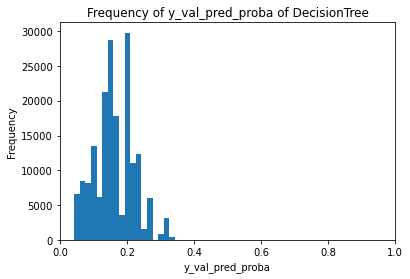

In [44]:
# Predict probabilities for new data
y_val_pred_proba = best_estimator.predict_proba(X_val) # 확률로 추정된 X_val의 y_pred

plt.hist(y_val_pred_proba[:,1], bins=20)

plt.xlabel('y_val_pred_proba')
plt.ylabel('Frequency')
plt.title('Frequency of y_val_pred_proba of %s'%(model_name))
plt.xlim([0,1])
#plt.savefig("%s_val_pre_proba.png"%(model_name), dpi=300, bbox_inches='tight')

plt.show() # y_val_pred_proba의 분포 확인

In [47]:
predict_arr = y_val_pred_proba[:,1]
predict_arr

array([0.24219835, 0.07452128, 0.17479434, ..., 0.15341472, 0.1262266 ,
       0.15341472])

In [63]:
renew_predict = []
for i in predict_arr:
    if i<0.18:
        renew_predict.append(0)
    else:
        renew_predict.append(1)

In [64]:
accuracy_score(renew_predict,y_val)

0.6252808331056936

In [65]:
recall_score(renew_predict,y_val)

0.22221089277650727

In [62]:
confusion_matrix(renew_predict,y_val)

array([[63979,  7486],
       [86323, 21589]])

### optimal threshold 선정 (threshold에 따른 목적함수 값 비교)

실제 positive = TP + FN

실제 Negative = TN + FP

정밀도: positive로 예측한 것 중에 진짜 positive인 것 -> 양성 예측도

재현율: 실제 positive 중에 맞춘 것 -> 민감도

In [27]:
threshold_list = np.linspace(0.1,0.2,n)

NameError: name 'n' is not defined

Threshold에 따른 지표 비교

0, 1 count / confusion_matrix / accuracy, precision, recall, f1 score 

In [25]:
def threshold_func(y_val, y_pred_proba, threshold_list):
    
    result_df = pd.DataFrame(index=['1_real','1_pred','0_real','0_pred','tn', 'fp', 'fn', 'tp', 'tn_%', 'fp_%', 'fn_%', 'tp_%', 'Accuracy', 'Precision', 'Recall', 'F1 score'])
    
    fig, axes = plt.subplots(nrows=int(n/2), ncols=2, figsize=(10, 10))
    
    for i in range(len(threshold_list)):
        
        threshold = threshold_list[i]
        
        # make Binarizer(y hat)
        binarizer = Binarizer(threshold = threshold).fit(y_pred_proba[:,1].reshape(-1,1))
        custom_predict = binarizer.transform(y_pred_proba[:,1].reshape(-1,1))

        # count 0, 1 in Binarizer(y hat)
        unique, counts = np.unique(custom_predict, return_counts=True)

        for val, count in zip(unique, counts):
            if len(unique) == 1:
                if val == 1.0:
                    num_0_pred = count
                    num_1_pred = 0
                elif val == 0.0:
                    num_1_pred = count
                    num_0_pred = 0
            if val == 1.0:
                num_0_pred = count
            elif val == 0.0:
                num_1_pred = count

        # count 0, 1 in y hat
        num_1_real = y_val.value_counts()[0]
        num_0_real = y_val.value_counts()[1]
        
        tn, fp, fn, tp = confusion_matrix(y_val, custom_predict).ravel()
        count = [tn, fp, fn, tp]
        tn_, fp_, fn_, tp_ = [round(x/sum(count)*100, 1) for x in count]
        
        accuracy = round((tp+tn)/(tp+tn+fp+fn),4)
        precision = round(tp/(tp+fp),4)
        recall = round(tp/(tp+fn),4)
        f1 = round(2*(precision*recall)/(precision+recall),4)
        
        threshold_tag = round(threshold_list[i], 4)
        
        result_df[threshold_tag] = [num_1_real, num_1_pred, num_0_real, num_0_pred, tn, fp, fn, tp, tn_, fp_, fn_, tp_, accuracy, precision, recall, f1]
        
        labels = ['TN','FP','FN','TP']
        
        # tn, fp, fn, tp 각각의 값을 counts 리스트에 저장
        counts = [tn, fp, fn, tp]

        # 해당하는 subplot에 그래프 그리기
        axes[i//2, i%2].bar(labels, counts)
        axes[i//2, i%2].set_title(threshold_tag)
        axes[i//2, i%2].set_ylabel('Count')

    # 그래프 간격 조절하기
    plt.tight_layout()
    
    plt.savefig("%s_threshold.png"%(model_name), dpi=300, bbox_inches='tight')

    # 그래프 출력하기
    plt.show()
    
    result_df.to_csv('%s_threshold.csv'%(model_name), index=True)
    
    return result_df

In [26]:
threshold_func(y_val, y_val_pred_proba, threshold_list)

NameError: name 'threshold_list' is not defined

Threshold에 따른 목적함수 값 비교

In [ ]:
def objective_func(threshold_list):
        opt_threshold = 0
        for i in range(len(threshold_list)):
            
            threshold = threshold_list[i]
        
        return opt_threshold

In [ ]:
objective_func(threshold_list)

histogram에 optimal threshold 표시

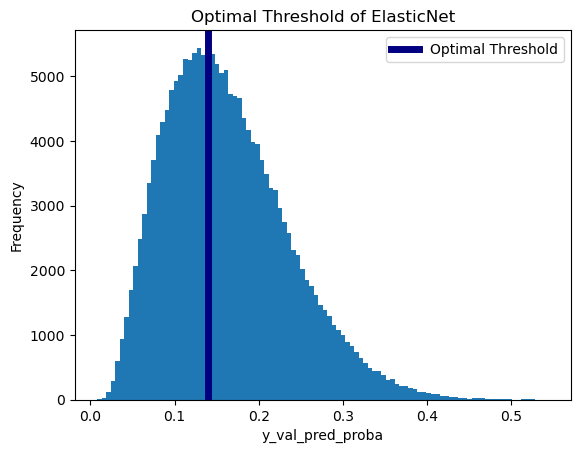

In [ ]:
plt.hist(y_val_pred_proba[:,1], bins=100)

plt.axvline(x=opt_threshold, color='navy', linewidth=5, label='Optimal Threshold')

plt.xlabel('y_val_pred_proba')
plt.ylabel('Frequency')
plt.title('Optimal Threshold of %s'%(model_name))
plt.legend()

plt.savefig("%s_opt_threshold.png"%(model_name), dpi=300, bbox_inches='tight')

plt.show() # y_val_pred_proba의 분포 확인

# Test 

### X_test fitting

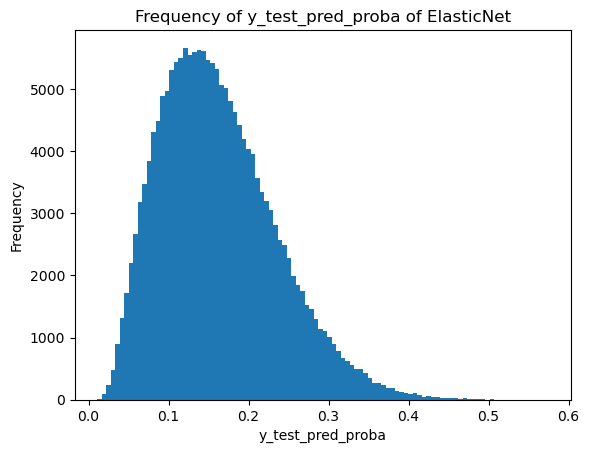

In [ ]:
# Predict probabilities for new data
y_test_pred_proba = best_estimator.predict_proba(X_test) # 확률로 추정된 X_test의 y_pred

plt.hist(y_test_pred_proba[:,1], bins=100)

plt.xlabel('y_test_pred_proba')
plt.ylabel('Frequency')
plt.title('Frequency of y_test_pred_proba of %s'%(model_name))

plt.savefig("%s_test_pre_proba.png"%(model_name), dpi=300, bbox_inches='tight')

plt.show() # y_test_pred_proba의 분포 확인

### 0, 1 count / confusion_matrix / accuracy, precision, recall, f1 score 

In [ ]:
test_func(y_test, y_test_pred_proba, opt_threshold)

NameError: name 'opt_threshold' is not defined

In [ ]:
def test_func(y_test, y_pred_proba, opt_threshold):
        
    # make Binarizer(y hat)
    binarizer = Binarizer(threshold = opt_threshold).fit(y_pred_proba[:,1].reshape(-1,1))
    custom_predict = binarizer.transform(y_pred_proba[:,1].reshape(-1,1))

    # count 0, 1 in Binarizer(y hat)
    unique, counts = np.unique(custom_predict, return_counts=True)

    for val, count in zip(unique, counts):
        if len(unique) == 1:
            if val == 1.0:
                num_0_pred = count
                num_1_pred = 0
            elif val == 0.0:
                num_1_pred = count
                num_0_pred = 0
        if val == 1.0:
            num_0_pred = count
        elif val == 0.0:
            num_1_pred = count

    # count 0, 1 in y hat
    num_1_real = y_test.value_counts()[0]
    num_0_real = y_test.value_counts()[1]

    tn, fp, fn, tp = confusion_matrix(y_test, custom_predict).ravel()
    count = [tn, fp, fn, tp]
    tn_, fp_, fn_, tp_ = [round(x/sum(count)*100, 1) for x in count]

    accuracy = round((tp+tn)/(tp+tn+fp+fn),4)
    precision = round(tp/(tp+fp),4)
    recall = round(tp/(tp+fn),4)
    f1 = round(2*(precision*recall)/(precision+recall),4)
    
    result_df = pd.DataFrame(index=['1_real','1_pred','0_real','0_pred','tn', 'fp', 'fn', 'tp', 'tn_%', 'fp_%', 'fn_%', 'tp_%', 'Accuracy', 'Precision', 'Recall', 'F1 score'])

    result_df['result'] = [num_1_real, num_1_pred, num_0_real, num_0_pred, tn, fp, fn, tp, tn_, fp_, fn_, tp_, accuracy, precision, recall, f1]

    labels = ['TN','FP','FN','TP']


    # 혼동 행렬 시각화
    labels = ['Positive', 'Negative']
    cm = [[tp, fn], [fp, tn]]

    ax = plt.subplot()
    sns.heatmap(cm, annot=True, ax=ax, fmt='g', cmap='Blues')
    ax.set_xlabel('Predicted Class')
    ax.set_ylabel('Acutual Class')
    ax.set_xticklabels(labels)
    ax.set_yticklabels(labels)
    ax.set_title('%s Confusion Matrix'%(model_name))
    
    ax.text(0.45, 1.40, 'FP', fontsize=12, color='red')
    ax.text(1.45, 1.40, 'TN', fontsize=12, color='red')
    ax.text(0.45, 0.40, 'TP', fontsize=12, color='red')
    ax.text(1.45, 0.40, 'FN', fontsize=12, color='red')
    
    plt.savefig("%s_Confusion_Matrix.png"%(model_name), dpi=300, bbox_inches='tight')
    plt.show()
    
    result_df.T.to_csv('%s_test.csv'%(model_name), index=True)

    return result_df.T

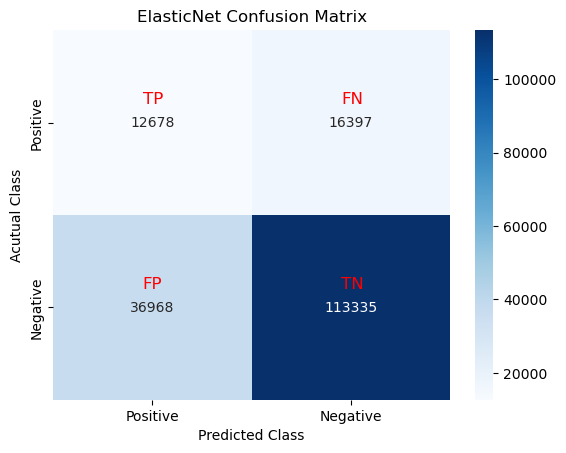

,1_real,1_pred,0_real,0_pred,tn,fp,fn,tp,tn_%,fp_%,fn_%,tp_%,Accuracy,Precision,Recall,F1 score
result,150303.0,129732.0,29075.0,49646.0,113335.0,36968.0,16397.0,12678.0,63.2,20.6,9.1,7.1,0.7025,0.2554,0.436,0.3221


In [ ]:
test_func(y_test, y_test_pred_proba, 0.2)

### ROC curve

거짓 양성 비율(FPR, 1-TNR:1-특이도)에 대한 진짜 양성 비율(TPR, 재현율)의 곡선

정밀도: positive로 예측한 것 중에 진짜 positive인 것 -> 양성 예측도

재현율: 실제 positive 중에 맞춘 것 -> 민감도

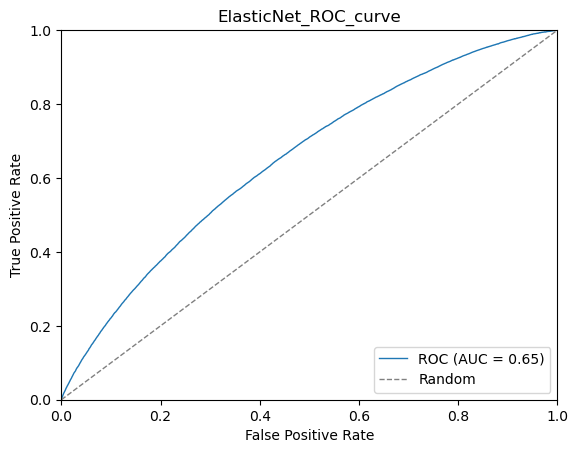

In [ ]:
# Generate ROC curve and AUC score for the test set
fpr, tpr, thresholds = roc_curve(y_test, y_test_pred_proba[:,1])
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.plot(fpr, tpr, lw=1, label='ROC (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], '--', color='gray', lw=1, label='Random')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('%s_ROC_curve'%(model_name))
plt.legend(loc='lower right')

plt.savefig("%s_ROC_curve.png"%(model_name), dpi=300, bbox_inches='tight')
plt.show()